# Importing libraries

In [120]:
import re
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

# Loading experiments data

## Processor information

In [18]:
processor_info = open('../data/processor-info.txt').read()
model_name = re.findall(r'(Model name:.*)',processor_info)[0]
number_sockets = re.findall(r'(Socket\(s\):.*)',processor_info)[0]
cores_per_sockets = re.findall(r'(Core\(s\) per socket:.*)',processor_info)[0]
threads_per_core = re.findall(r'(Thread\(s\) per core:.*)',processor_info)[0]

print("All experiments were performed in a machine with processors:\n")
print("{}\n{}\n{}\n{}".format(model_name,number_sockets,cores_per_sockets,threads_per_core))

All experiments were performed in a machine with processors:

Model name:                      Intel(R) Xeon(R) CPU @ 2.30GHz
Socket(s):                       1
Core(s) per socket:              4
Thread(s) per core:              2


## Sequential experiment

In [42]:
sequential_results = open('../data/sequential.txt').read()

trapezoidal_parameter_n = int(re.findall(r'.*Com n = ([0-9]*)',sequential_results)[0])
trapezoidal_parameter_a = float(re.findall(r'.*integral de ([0-9]*\.[0-9]*)',sequential_results)[0])
trapezoidal_parameter_b = float(re.findall(r'.*até ([0-9]*\.[0-9]*)',sequential_results)[0])
trapezoidal_parameter_integral = float(re.findall(r'.*= ([0-9]*\.[0-9]*)',sequential_results)[0])

sequential_elapsed_seconds = float(re.findall(r'Foram gastos ([0-9]*\.[0-9]*)',sequential_results)[0])

print("Elapsed time for sequential code: {} seconds\n".format(sequential_elapsed_seconds))

print("Problem parameters:")
print("\tn = {}\n\ta = {}\n\tb = {}\n\tintegral = {}".format(
    trapezoidal_parameter_n,
    trapezoidal_parameter_a,
    trapezoidal_parameter_b,
    trapezoidal_parameter_integral))

Elapsed time for sequential code: 1.2 seconds

Problem parameters:
	n = 100000000
	a = 0.0
	b = 1.0
	integral = 1.718282


## Paralel experiments

In [98]:
paralel_experiments_n_processors = np.sort(re.findall(r'paralel-(.*)\.txt',"\n".join(os.listdir("../data"))))
paralel_experiments_n_processors = list(map(lambda x: int(x), paralel_experiments_n_processors))

paralel_elapsed_seconds = dict()

for n in paralel_experiments_n_processors:
    filename = "paralel-{}.txt".format(n)
    paralel_results = open('../data/{}'.format(filename)).read()

    try:
        trapezoidal_parameter_n = int(re.findall(r'.*Com n = ([0-9]*)',paralel_results)[0])
        trapezoidal_parameter_a = float(re.findall(r'.*integral de ([0-9]*\.[0-9]*)',paralel_results)[0])
        trapezoidal_parameter_b = float(re.findall(r'.*até ([0-9]*\.[0-9]*)',paralel_results)[0])
        trapezoidal_parameter_integral = float(re.findall(r'.*= ([0-9]*\.[0-9]*)',paralel_results)[0])

        paralel_elapsed_seconds[n] = float(re.findall(r'Foram gastos ([0-9]*\.[0-9]*)',paralel_results)[0])

        print("Elapsed time for paralel code: {} seconds\n".format(paralel_elapsed_seconds[n]))

        print("Problem parameters:")
        print("\tn = {}\n\ta = {}\n\tb = {}\n\tintegral = {}\n\n".format(
            trapezoidal_parameter_n,
            trapezoidal_parameter_a,
            trapezoidal_parameter_b,
            trapezoidal_parameter_integral))

    except:
        print("It was not possible to parse experiment results. Please, check the file '../data/{}'.\n\n".format(filename))

Elapsed time for paralel code: 1.4 seconds

Problem parameters:
	n = 100000000
	a = 0.0
	b = 1.0
	integral = 1.718282


Elapsed time for paralel code: 0.9 seconds

Problem parameters:
	n = 100000000
	a = 0.0
	b = 1.0
	integral = 1.718282


Elapsed time for paralel code: 0.7 seconds

Problem parameters:
	n = 100000000
	a = 0.0
	b = 1.0
	integral = 1.718282


It was not possible to parse experiment results. Please, check the file '../data/paralel-5.txt'.


It was not possible to parse experiment results. Please, check the file '../data/paralel-6.txt'.


It was not possible to parse experiment results. Please, check the file '../data/paralel-7.txt'.


It was not possible to parse experiment results. Please, check the file '../data/paralel-8.txt'.




# Generating plots

In [107]:
# Creating a pandas dataframe to the data
n_processors = np.sort(list(paralel_elapsed_seconds.keys()))
df = pd.DataFrame()
df['paralel_n_processors'] = n_processors
df['paralel_time(s)'] = list(map(lambda x: paralel_elapsed_seconds[x],n_processors))
df['sequential_time(s)'] = sequential_elapsed_seconds
df['ideal_speedup'] = n_processors
df['speedup'] = [df['sequential_time(s)'][i]/df['paralel_time(s)'][i] for i in df.index]
df

,paralel_n_processors,paralel_time(s),sequential_time(s),ideal_speedup,speedup
0,2,1.4,1.2,2,0.857143
1,3,0.9,1.2,3,1.333333
2,4,0.7,1.2,4,1.714286


0    2
1    3
2    4
Name: paralel_n_processors, dtype: int64

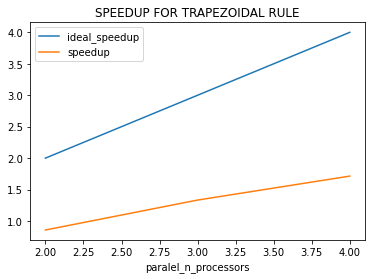

In [124]:
df.plot.line(x="paralel_n_processors",y=["ideal_speedup","speedup"])
plt.title("SPEEDUP FOR TRAPEZOIDAL RULE")